In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from src.pokemon import Pokemon, PokemonFactory, StatusEffect
from src.catching import attempt_catch

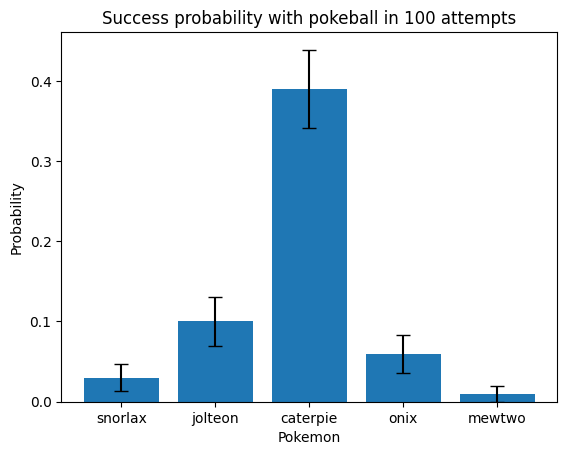

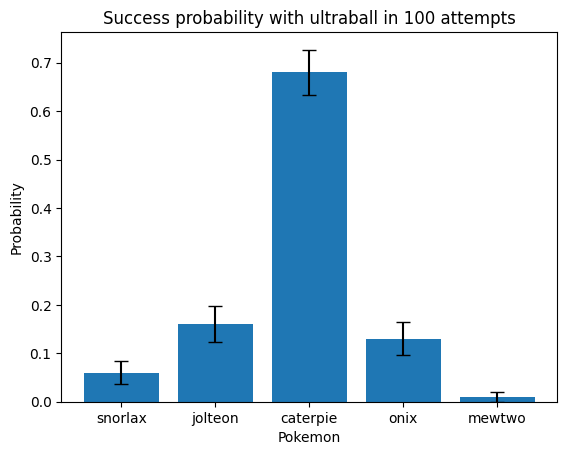

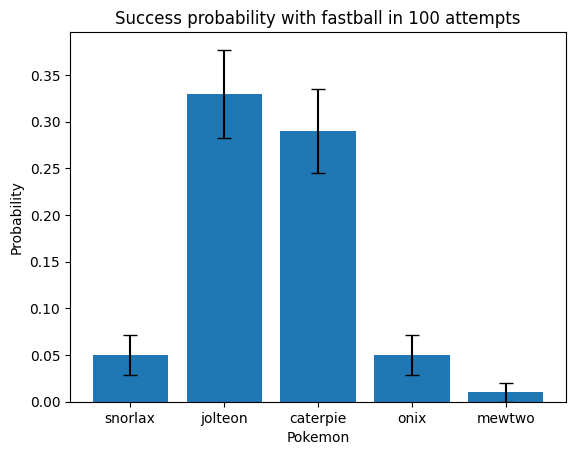

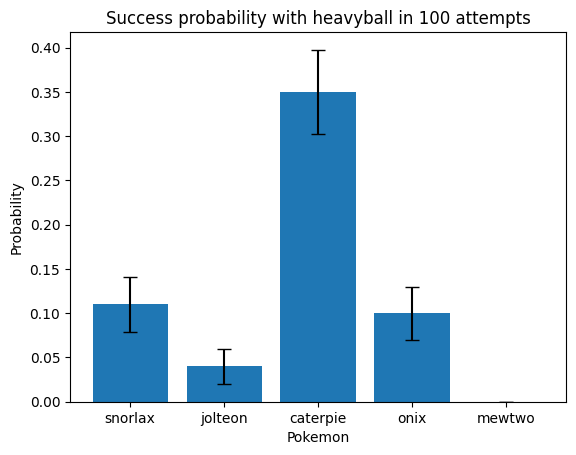

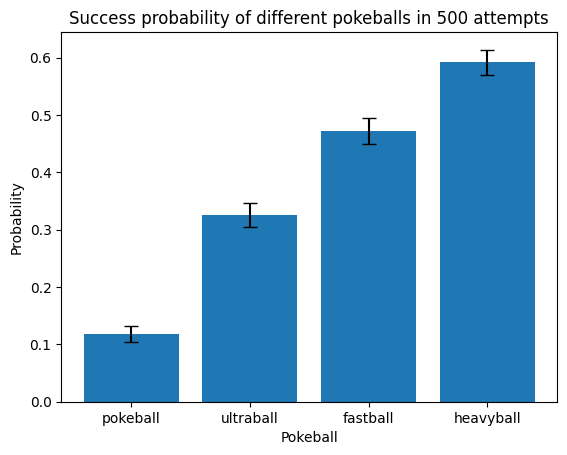

In [53]:
factory = PokemonFactory("pokemon.json")
snorlax = factory.create("snorlax", 100, StatusEffect.NONE, 1)
jolteon = factory.create("jolteon", 100, StatusEffect.NONE, 1)
caterpie = factory.create("caterpie", 100, StatusEffect.NONE, 1)
onix = factory.create("onix", 100, StatusEffect.NONE, 1)
mewtwo = factory.create("mewtwo", 100, StatusEffect.NONE, 1)

pokemons = [snorlax,jolteon, caterpie, onix, mewtwo]
pokemons_names=["snorlax","jolteon", "caterpie", "onix", "mewtwo"]
pokeballs=["pokeball", "ultraball", "fastball", "heavyball"]
num_runs = 100
pokeball_runs=num_runs*len(pokemons)
pokeball_success_probs=[]
pokeball_error_probs=[]
pokeball_success=0
for pokeball in pokeballs:
    success_probs = []
    error_probs = []
    for pokemon in pokemons:
        successes = 0
        for i in range(num_runs):
            success, prob = attempt_catch(pokemon,pokeball)
            if success:
                successes += 1
                pokeball_success+=1
        success_prob = successes / num_runs
        error_prob = np.sqrt(success_prob * (1 - success_prob) / num_runs)
        success_probs.append(success_prob)
        error_probs.append(error_prob)
    plt.bar(pokemons_names, success_probs, yerr=error_probs, capsize=5)
    plt.xlabel('Pokemon')
    plt.ylabel('Probability')
    plt.title('Success probability with {} in {} attempts'.format(pokeball, num_runs))
    plt.show()
    pokeball_success_prob=pokeball_success/pokeball_runs
    pokeball_error_prob = np.sqrt(pokeball_success_prob * (1 - pokeball_success_prob) / pokeball_runs)
    pokeball_success_probs.append(pokeball_success_prob)
    pokeball_error_probs.append(pokeball_error_prob)
plt.bar(pokeballs, pokeball_success_probs, yerr=[pokeball_error_probs, pokeball_error_probs], capsize=5)
plt.xlabel('Pokeball')
plt.ylabel('Probability')
plt.title('Success probability of different pokeballs in {} attempts'.format(pokeball_runs))
plt.show()


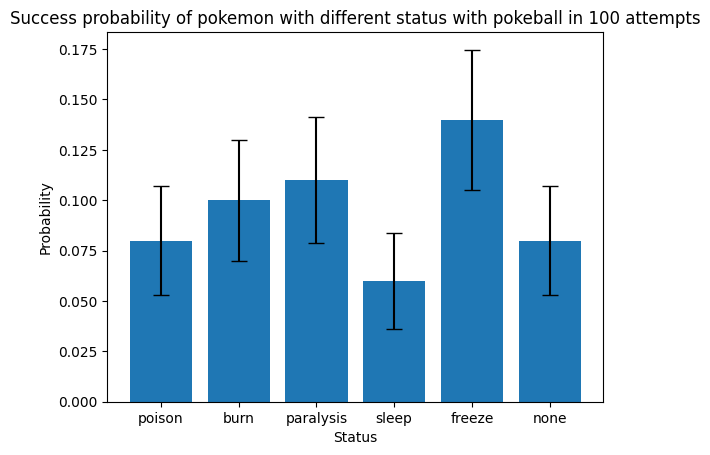

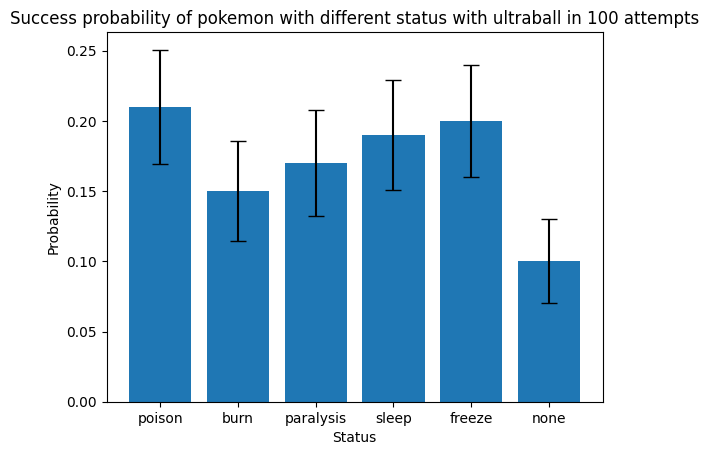

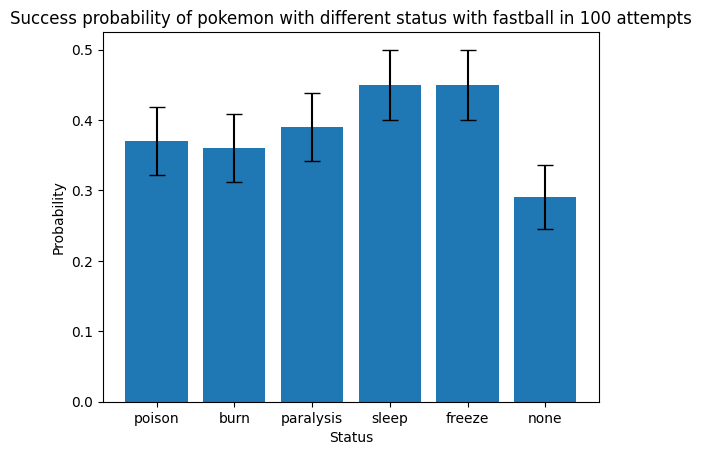

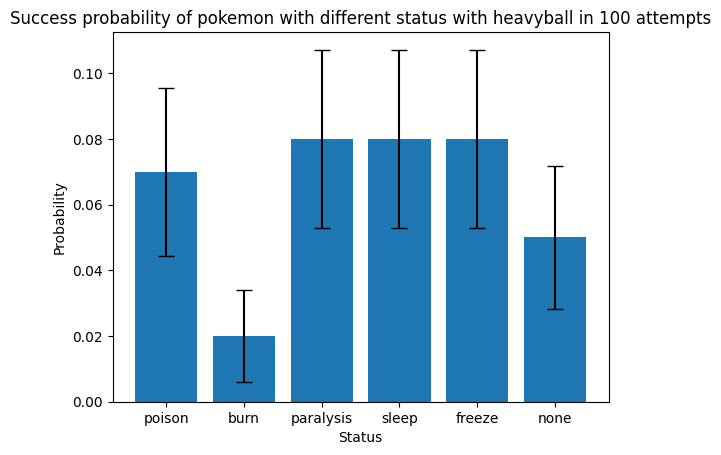

In [16]:
factory = PokemonFactory("pokemon.json")
poison = factory.create("snorlax", 100, StatusEffect.POISON, 1)
burn = factory.create("snorlax", 100, StatusEffect.BURN, 1)
paralysis = factory.create("snorlax", 100, StatusEffect.PARALYSIS, 1)
sleep = factory.create("snorlax", 100, StatusEffect.SLEEP, 1)
freeze = factory.create("snorlax", 100, StatusEffect.FREEZE, 1)
none = factory.create("snorlax", 100, StatusEffect.NONE, 1)

pokemons = [poison,burn, paralysis, sleep, freeze, none]
pokemons_names=["poison","burn", "paralysis", "sleep", "freeze", "none"]
pokeballs=["pokeball", "ultraball", "fastball", "heavyball"]
num_runs = 100
for pokeball in pokeballs:
    success_probs = []
    error_probs = []
    for pokemon in pokemons:
        successes = 0
        for i in range(num_runs):
            success, prob = attempt_catch(pokemon,pokeball)
            if success:
                successes += 1
        success_prob = successes / num_runs
        error_prob = np.sqrt(success_prob * (1 - success_prob) / num_runs)
        success_probs.append(success_prob)
        error_probs.append(error_prob)
    plt.bar(pokemons_names, success_probs, yerr=error_probs, capsize=5)
    plt.xlabel('Status')
    plt.ylabel('Probability')
    plt.title('Success probability of pokemon with different status with {} in {} attempts'.format(pokeball, num_runs))
    plt.show()


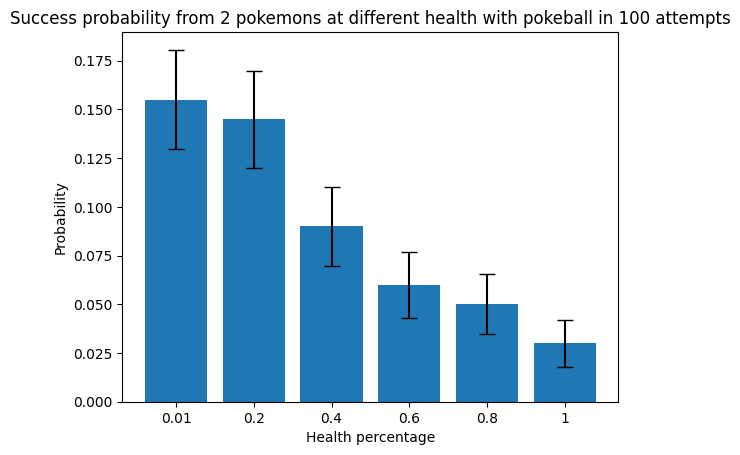

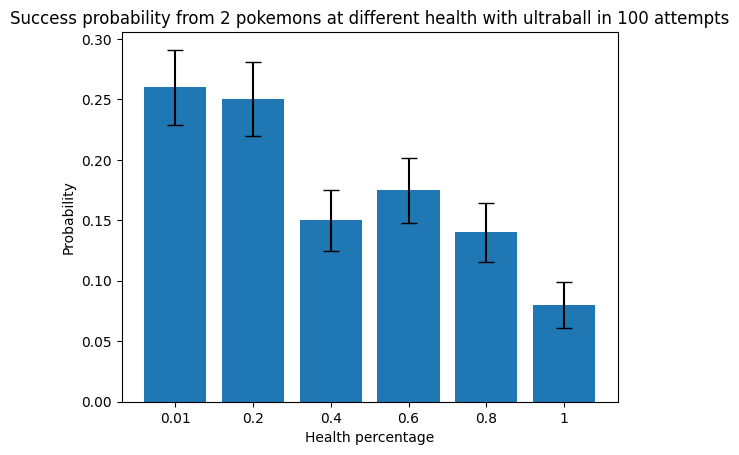

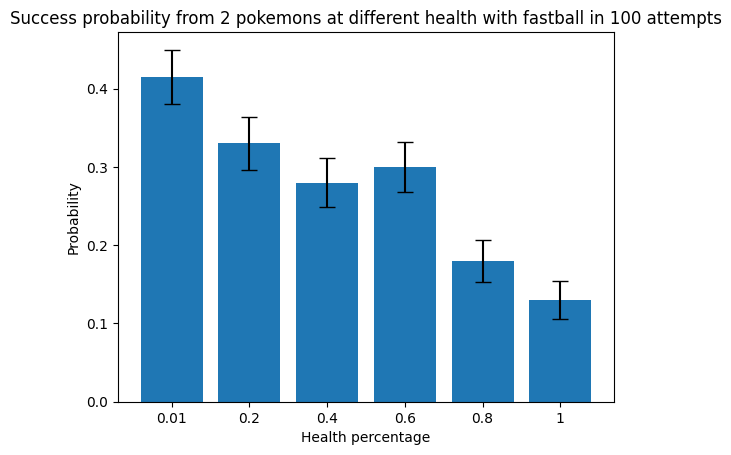

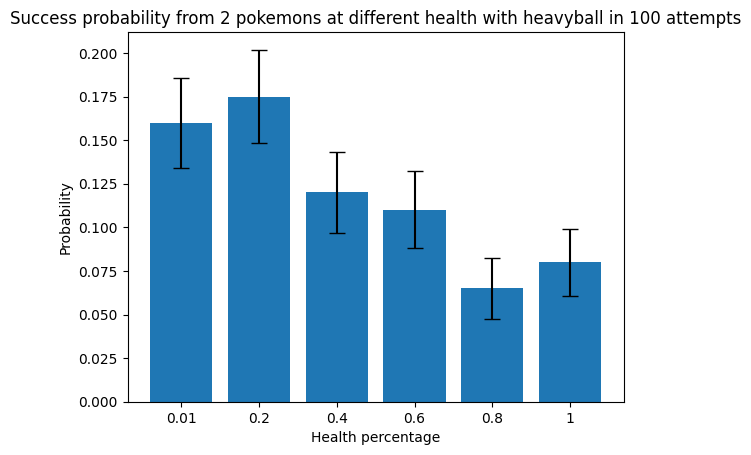

In [17]:
factory = PokemonFactory("pokemon.json")
snorlax1 = factory.create("snorlax", 100, StatusEffect.NONE, 0.01)
jolteon1 = factory.create("jolteon", 100, StatusEffect.NONE, 0.01)
snorlax2 = factory.create("snorlax", 100, StatusEffect.NONE, 0.2)
jolteon2 = factory.create("jolteon", 100, StatusEffect.NONE, 0.2)
snorlax3 = factory.create("snorlax", 100, StatusEffect.NONE, 0.4)
jolteon3 = factory.create("jolteon", 100, StatusEffect.NONE, 0.4)
snorlax4 = factory.create("snorlax", 100, StatusEffect.NONE, 0.6)
jolteon4 = factory.create("jolteon", 100, StatusEffect.NONE, 0.6)
snorlax5 = factory.create("snorlax", 100, StatusEffect.NONE, 0.8)
jolteon5 = factory.create("jolteon", 100, StatusEffect.NONE, 0.8)
snorlax6 = factory.create("snorlax", 100, StatusEffect.NONE, 1)
jolteon6 = factory.create("jolteon", 100, StatusEffect.NONE, 1)



pokemon_groups = [[snorlax1,jolteon1],[snorlax2,jolteon2], [snorlax3,jolteon3], [snorlax4,jolteon4], [snorlax5,jolteon5],[snorlax6,jolteon6]]
pokemons_names=["0.01","0.2", "0.4", "0.6", "0.8","1"]
pokeballs=["pokeball", "ultraball", "fastball", "heavyball"]
num_runs = 100
pokemon_groups_run=num_runs*2
for pokeball in pokeballs:
    success_probs = []
    error_probs = []
    for pokemons in pokemon_groups:
        successes = 0
        for pokemon in pokemons:
            for i in range(num_runs):
                success, prob = attempt_catch(pokemon,pokeball)
                if success:
                    successes += 1
        success_prob = successes / pokemon_groups_run
        error_prob = np.sqrt(success_prob * (1 - success_prob) / pokemon_groups_run)
        success_probs.append(success_prob)
        error_probs.append(error_prob)
    plt.bar(pokemons_names, success_probs, yerr=error_probs, capsize=5)
    plt.xlabel('Health percentage')
    plt.ylabel('Probability')
    plt.title('Success probability from 2 pokemons at different health with {} in {} attempts'.format(pokeball, num_runs))
    plt.show()